# Supervised Neural Network

In [1]:
import aux
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Carregar os datasets
og_df, pca_df, pearson_df, lda_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

### Dataset Original

In [3]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

In [4]:
params = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (100, 100, 50)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

clf_model = MLPClassifier()
grid_search = RandomizedSearchCV(clf_model, params, random_state=42, n_jobs=-1)
grid_search.fit(og_X_train, og_y_train)

og_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'learning_rate_init': 0.0001, 'hidden_layer_sizes': (100,), 'alpha': 0.0001}


In [5]:
clf = MLPClassifier(**og_best_params)
clf.fit(og_X_train, og_y_train)

y_pred = clf.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7265, Falsos Não-Ataques: 5
Falsos Ataques: 86, Verdadeiros Não-Ataques: 7149
AUC: 0.994
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      7270
           1       1.00      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por Pearson

In [6]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

In [7]:
clf_model = MLPClassifier()
grid_search = RandomizedSearchCV(clf_model, params, random_state=42, n_jobs=-1)
grid_search.fit(pearson_X_train, pearson_y_train)

pearson_best_params = grid_search.best_params_
print(grid_search.best_params_)

/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/skle

{'learning_rate_init': 0.0001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001}


In [8]:
clf = MLPClassifier(**pearson_best_params)
clf.fit(pearson_X_train, pearson_y_train)

y_pred = clf.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7220, Falsos Não-Ataques: 50
Falsos Ataques: 57, Verdadeiros Não-Ataques: 7178
AUC: 0.993
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      7270
           1       0.99      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por PCA

In [9]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

In [10]:
clf_model = MLPClassifier()
grid_search = RandomizedSearchCV(clf_model, params, random_state=42, n_jobs=-1)
grid_search.fit(pca_X_train, pca_y_train)

pca_best_params = grid_search.best_params_
print(grid_search.best_params_)

/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cesar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.0001}


In [11]:
clf = MLPClassifier(**pca_best_params)
clf.fit(pca_X_train, pca_y_train)

y_pred = clf.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7239, Falsos Não-Ataques: 31
Falsos Ataques: 113, Verdadeiros Não-Ataques: 7122
AUC: 0.99
              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99      7270
         1.0       1.00      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por LDA

In [12]:
lda_X_train, lda_X_test, lda_y_train, lda_y_test = aux.prepare_dataset(lda_df)

In [13]:
clf_model = MLPClassifier()
grid_search = RandomizedSearchCV(clf_model, params, random_state=42, n_jobs=-1)
grid_search.fit(lda_X_train, lda_y_train)

lda_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.0001}


In [14]:
clf = MLPClassifier(**lda_best_params)
clf.fit(lda_X_train, lda_y_train)

y_pred = clf.predict(lda_X_test)

auc, f1 = aux.analyse_ml_results(lda_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7228, Falsos Não-Ataques: 42
Falsos Ataques: 132, Verdadeiros Não-Ataques: 7103
AUC: 0.988
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99      7270
         1.0       0.99      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



## Comparação dos Métodos

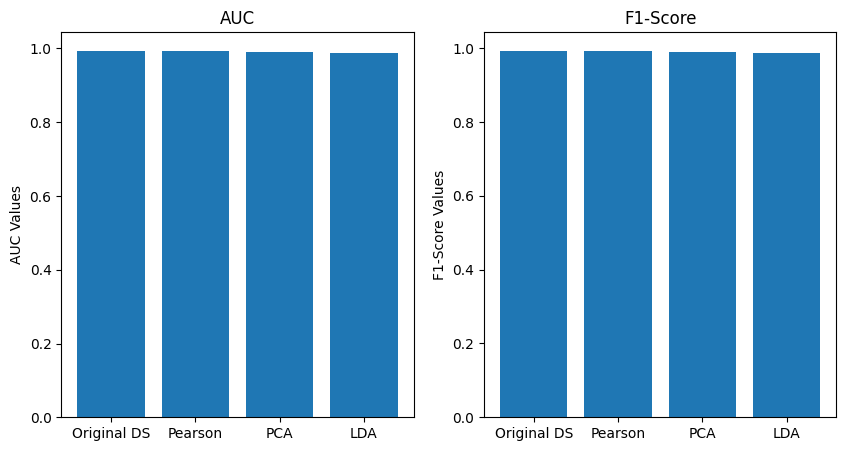

In [15]:
aux.plot_auc_and_f1(auc_values, f1_score_values)

In [16]:
print(auc_values, f1_score_values)

[0.994, 0.993, 0.99, 0.988] [0.9937260210813278, 0.9926232230596348, 0.9900719361035322, 0.9880034950280436]
